<a href="https://colab.research.google.com/github/sagnikmitra/ML_colab/blob/master/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Seed_Data.csv to Seed_Data.csv


What is Clusetering?
Clustering is Logical Grouping. 

In [9]:
sd = pd.read_csv('Seed_Data.csv',index_col = 0)
sd.head()

,P,C,LK,WK,A_Coef,LKG,target
A,,,,,,,
15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [4]:
from google.colab import files
uploaded = files.upload()

Saving Coded_Data.csv to Coded_Data.csv


In [7]:
cd = pd.read_csv('Coded_Data.csv',index_col = 0)
cd.head()

,Cd_1,Cd_2,Cd_3,Cd_4,Cd_5,Cd_6,Cd_7,Cd_8,Cd_9,Cd_10,Result
1,53.1,63.4,33.0,46.2,47.3,21.2,44.3,36.1,46.6,65.0,Y
2,36.9,54.7,31.1,50.5,56.0,38.9,39.4,56.8,33.0,78.8,N
3,41.9,65.5,53.5,52.3,92.5,43.2,94.9,64.7,50.8,67.9,N
4,71.7,75.6,37.9,50.5,69.2,52.5,82.3,77.3,80.8,60.9,Y
5,74.3,51.8,36.4,40.9,74.7,42.2,65.1,36.2,77.6,74.9,Y


In [10]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cd_1    1000 non-null   float64
 1   Cd_2    1000 non-null   float64
 2   Cd_3    1000 non-null   float64
 3   Cd_4    1000 non-null   float64
 4   Cd_5    1000 non-null   float64
 5   Cd_6    1000 non-null   float64
 6   Cd_7    1000 non-null   float64
 7   Cd_8    1000 non-null   float64
 8   Cd_9    1000 non-null   float64
 9   Cd_10   1000 non-null   float64
 10  Result  1000 non-null   object 
dtypes: float64(10), object(1)
memory usage: 93.8+ KB


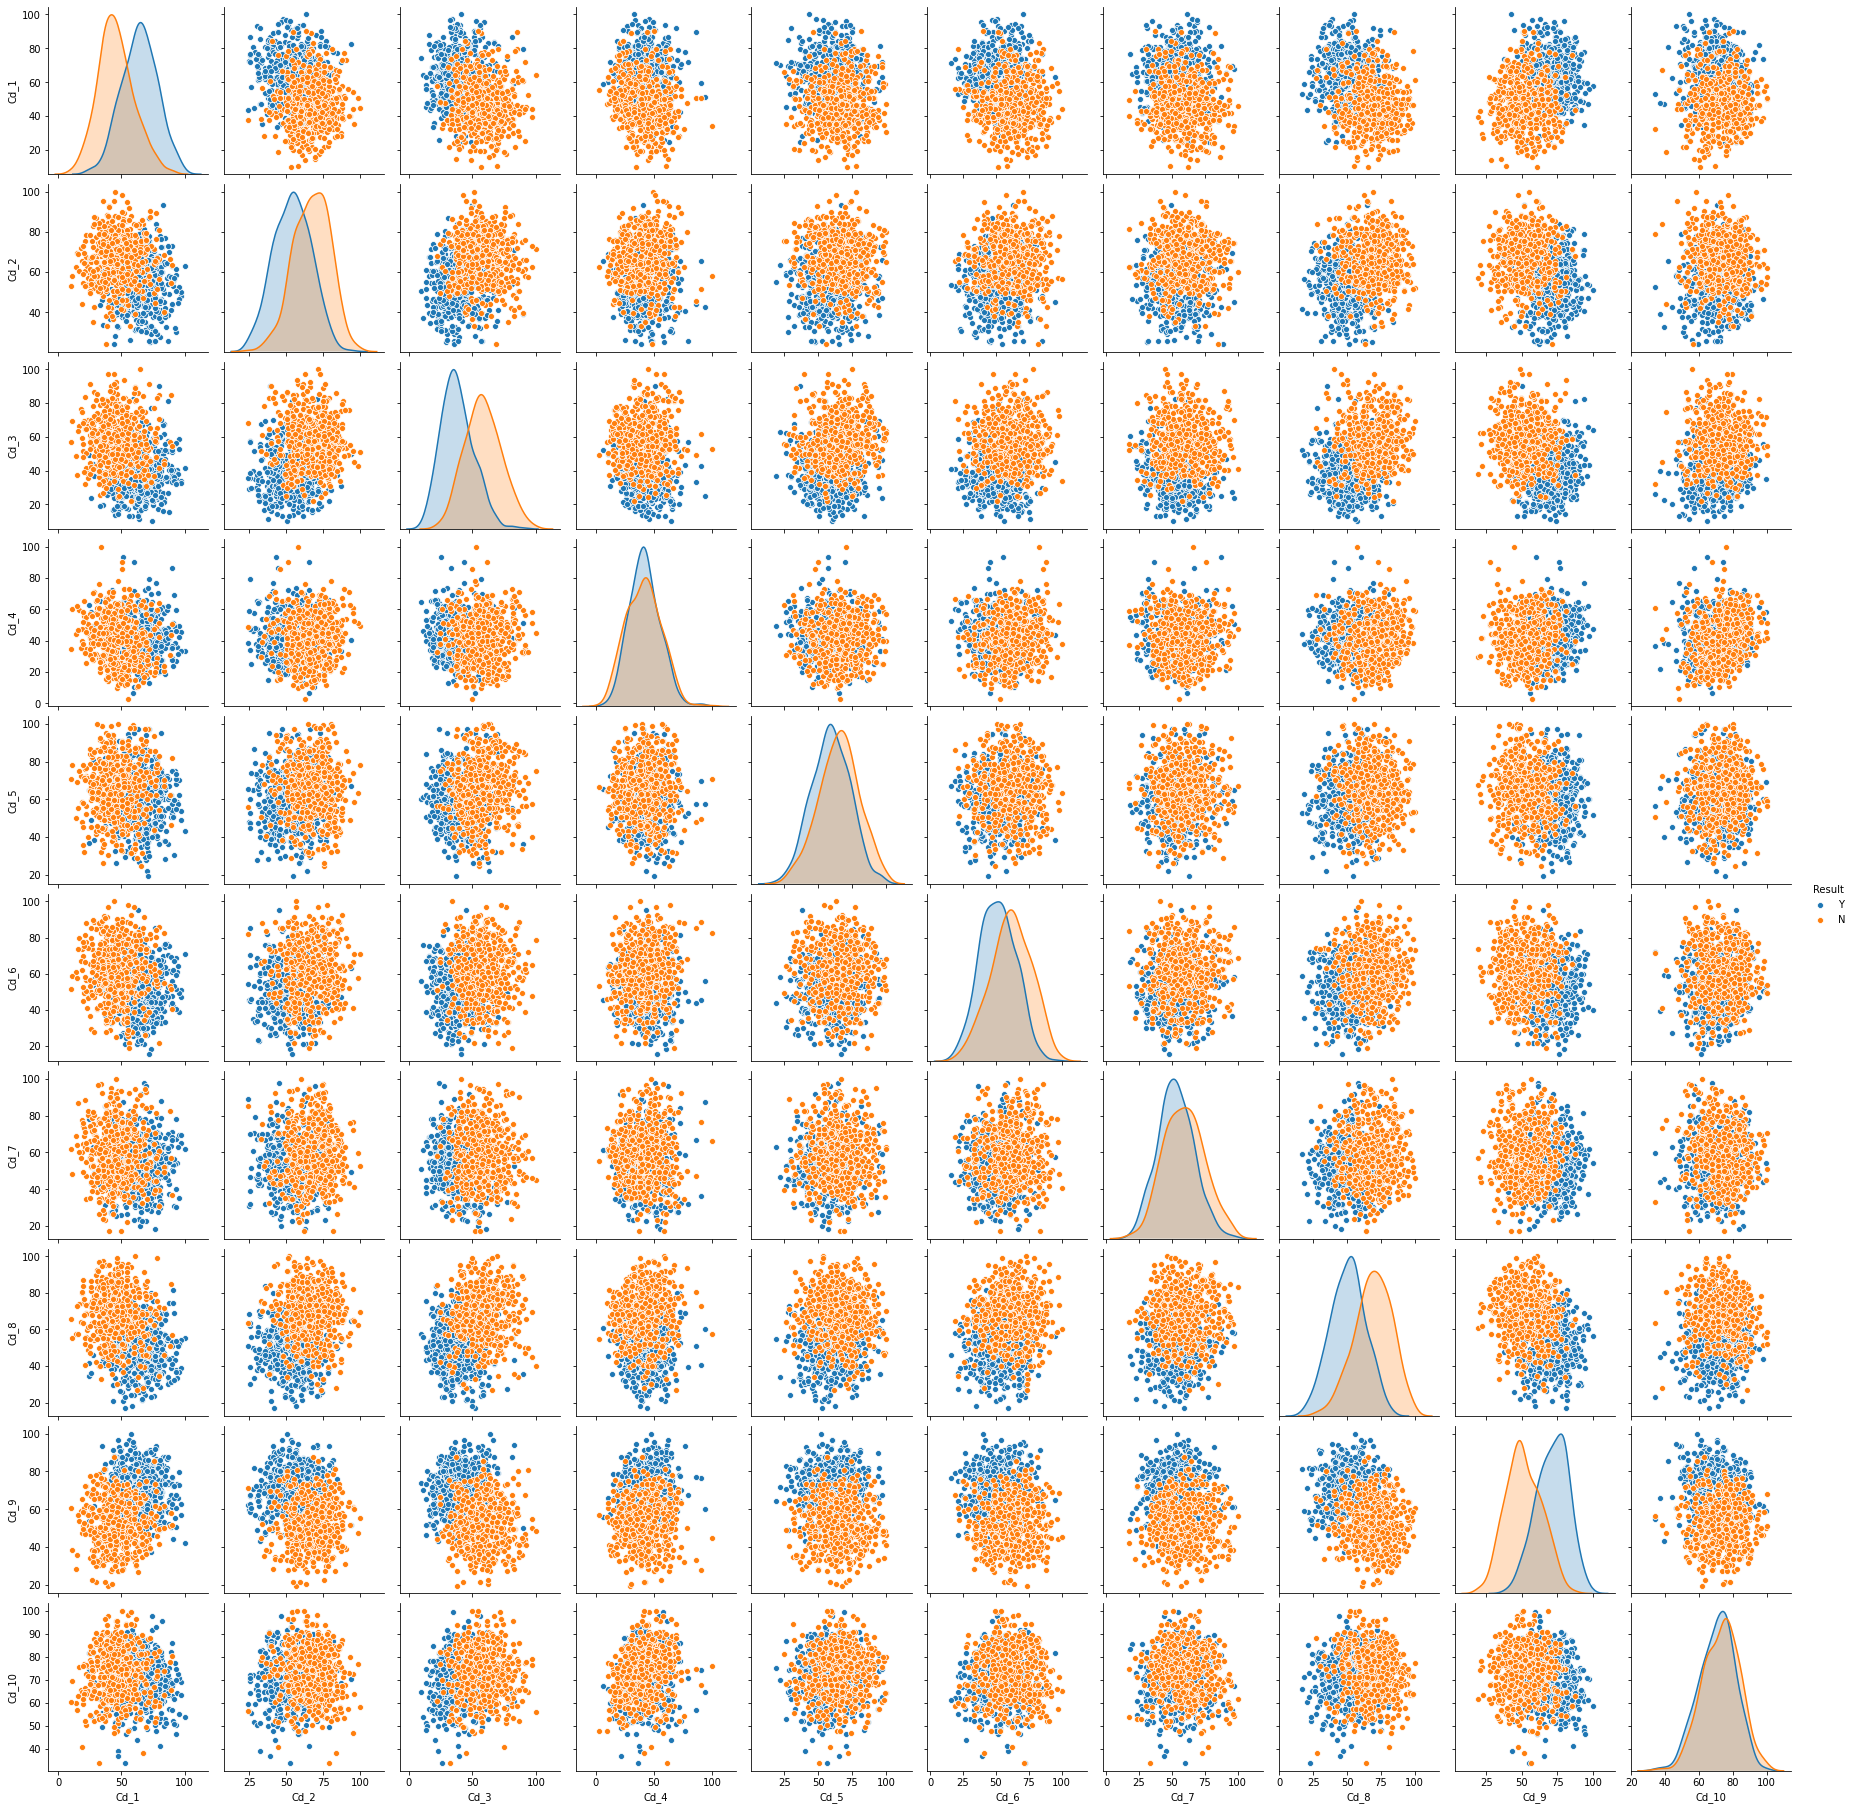

In [11]:
sns.pairplot(df,hue='Result')

VARIABLE STANDARDIZATION
We have to identify the DataPoints that are nearest to the test data point (Majority voting based on the K value)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
cd

,Cd_1,Cd_2,Cd_3,Cd_4,Cd_5,Cd_6,Cd_7,Cd_8,Cd_9,Cd_10,Result
1,53.1,63.4,33.0,46.2,47.3,21.2,44.3,36.1,46.6,65.0,Y
2,36.9,54.7,31.1,50.5,56.0,38.9,39.4,56.8,33.0,78.8,N
3,41.9,65.5,53.5,52.3,92.5,43.2,94.9,64.7,50.8,67.9,N
4,71.7,75.6,37.9,50.5,69.2,52.5,82.3,77.3,80.8,60.9,Y
5,74.3,51.8,36.4,40.9,74.7,42.2,65.1,36.2,77.6,74.9,Y
...,...,...,...,...,...,...,...,...,...,...,...
996,58.7,56.4,49.5,38.1,62.8,35.2,43.6,17.9,59.3,71.2,Y
997,33.4,52.1,54.7,48.5,85.7,76.2,61.6,40.0,50.8,87.8,N
998,66.0,53.6,45.4,56.1,54.6,53.1,22.6,21.8,48.8,73.2,Y
999,63.0,47.0,23.6,40.7,97.5,56.6,50.0,59.4,67.7,62.7,Y


In [0]:
target = cd['Result']
features = cd.drop('Result',axis=1)

In [15]:
features.head()

,Cd_1,Cd_2,Cd_3,Cd_4,Cd_5,Cd_6,Cd_7,Cd_8,Cd_9,Cd_10
1,53.1,63.4,33.0,46.2,47.3,21.2,44.3,36.1,46.6,65.0
2,36.9,54.7,31.1,50.5,56.0,38.9,39.4,56.8,33.0,78.8
3,41.9,65.5,53.5,52.3,92.5,43.2,94.9,64.7,50.8,67.9
4,71.7,75.6,37.9,50.5,69.2,52.5,82.3,77.3,80.8,60.9
5,74.3,51.8,36.4,40.9,74.7,42.2,65.1,36.2,77.6,74.9


In [16]:
target.head()

1    Y
2    N
3    N
4    Y
5    Y
Name: Result, dtype: object

In [17]:
scaler.fit(features)

StandardScaler(copy=True, with_mean=True, with_std=True)

So, we have the fitted features to the scaler object, We will use this scaler object to transform all the features using .transform() method.

In [0]:
scaled_features = scaler.transform(features)

In [19]:
type(scaled_features)

numpy.ndarray

In [20]:
#Let's comvert this NumPy Array to Pandas DataFrame.
#We can use our cd.columns to get the column name and pass that to the DataFrame along with the Scaled_Features, we don't need the results.
cols = df.columns[:-1]
cols 

Index(['Cd_1', 'Cd_2', 'Cd_3', 'Cd_4', 'Cd_5', 'Cd_6', 'Cd_7', 'Cd_8', 'Cd_9',
       'Cd_10'],
      dtype='object')

In [22]:
cd_scaled_features = pd.DataFrame(scaled_features, columns=cols)
cd_scaled_features.head()

,Cd_1,Cd_2,Cd_3,Cd_4,Cd_5,Cd_6,Cd_7,Cd_8,Cd_9,Cd_10
0,-0.122525,0.187569,-0.911832,0.318653,-1.035516,-2.305940,-0.801865,-1.480070,-0.952562,-0.645366
1,-1.086028,-0.433403,-1.024151,0.624941,-0.445471,-1.153296,-1.131088,-0.200556,-1.826218,0.635103
2,-0.788651,0.337459,0.300034,0.753154,2.030007,-0.873275,2.597862,0.287761,-0.682756,-0.376282
3,0.983718,1.058359,-0.622166,0.624941,0.449771,-0.267648,1.751290,1.066595,1.244427,-1.025795
4,1.138354,-0.640394,-0.710839,-0.058864,0.822788,-0.938396,0.595651,-1.473889,1.038861,0.273232


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = scaled_features
y = target

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.27, random_state = 101)

Our main objective